Для выбранного датасета с сайта https://github.com/YBI-Foundation/Dataset
Выберите бинарную переменную (или сконструируйте из количественной)
Выберите несколько объясняющих переменных
Разделите датасет на обучающую, валидационную и тестовую выборки
Обучите несколько вариантов нейронных сетей с 1, 2, 3 и 4 линейными слоями
Попробуйте разные функции активации: ReLU, Tanh, Sigmoid, LeakyReLU
Попробуйте разные оптимизаторы: SGD, Adam
Попробуйте разное количество эпох: 1000, 5000, 10000
Какая комбинация дает наилучшую точность на тестовой выборке?
Сделайте предсказания целевой переменной для тестовой выборки
Постройте матрицу ошибок и рассчитайте метрики качества
Сделайте выводы относительно полученных моделей и их качества
Сравните качество нейросети с ансамблевыми моделями классификаторов

# Загрузка данных

In [8]:
# pip3 install torch torchvision --index-url https://download.pytorch.org/whl/cu121
# pip install torch==2.2.2 torchvision==0.17.2 torchaudio==2.2.2 --index-url https://download.pytorch.org/whl/cu121     
# pip install torch==2.5.1 torchvision==0.20.1 torchaudio==2.5.1 --index-url https://download.pytorch.org/whl/cu121
# Импорт необходимых библиотек
import pandas as pd
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
torch.cuda.is_available()

True

## Бинарная переменная

In [10]:
data = pd.read_csv('RedWineQuality.csv', sep=';')

# Создание бинарной целевой переменной
data['good_quality'] = (data['quality'] >= 6).astype(int)

# Выбор признаков и целевой переменной
#features = ['volatile acidity', 'density', 'alcohol', 'sulphates']
#X = data[features]
X = data.drop(['good_quality', 'quality'], axis=1)
y = data['good_quality']


In [11]:
# Загрузка данных
if False:
    data = pd.read_csv('Never Trust Summary Statistics.tsv', delimiter="\t")

    # Создание бинарной целевой переменной
    data.loc[ data["dataset"] != 'bullseye', "dataset"] = 0
    data.loc[ data["dataset"] == 'bullseye', "dataset"] = 1
    data["dataset"] = data["dataset"].astype(int)

    # Выбор признаков и целевой переменной
    features = ['x', 'y']
    X = data[features]
    y = data['dataset']


# Разделение данных: 60% train, 20% validation, 20% test

In [12]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.176, stratify=y_temp, random_state=42)

In [13]:
# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Преобразование в тензоры PyTorch
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train.values).view(-1, 1)
X_val_tensor = torch.FloatTensor(X_val_scaled)
y_val_tensor = torch.FloatTensor(y_val.values).view(-1, 1)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.FloatTensor(y_test.values).view(-1, 1)

# Создание DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Обучение моделей

In [14]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Используется устройство: {device}")

Используется устройство: cuda


In [15]:
# Определение архитектур нейронных сетей
class NeuralNet1(nn.Module):
    def __init__(self, input_size, activation_fn):
        super(NeuralNet1, self).__init__()
        self.layer1 = nn.Linear(input_size, 1)
        self.activation = activation_fn
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.activation(self.layer1(x))
        x = self.sigmoid(x)
        return x

class NeuralNet2(nn.Module):
    def __init__(self, input_size, activation_fn):
        super(NeuralNet2, self).__init__()
        self.layer1 = nn.Linear(input_size, 32)
        self.layer2 = nn.Linear(32, 1)
        self.activation = activation_fn
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        x = self.sigmoid(x)
        return x

class NeuralNet3(nn.Module):
    def __init__(self, input_size, activation_fn):
        super(NeuralNet3, self).__init__()
        self.layer1 = nn.Linear(input_size, 32)
        self.layer2 = nn.Linear(32, 8)
        self.layer3 = nn.Linear(8, 1)
        self.activation = activation_fn
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        x = self.activation(self.layer3(x))
        x = self.sigmoid(x)
        return x

class NeuralNet4(nn.Module):
    def __init__(self, input_size, activation_fn):
        super(NeuralNet4, self).__init__()
        self.layer1 = nn.Linear(input_size, 32)
        self.layer2 = nn.Linear(32, 16)
        self.layer3 = nn.Linear(16, 4)
        self.layer4 = nn.Linear(4, 1)
        self.activation = activation_fn
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        x = self.activation(self.layer3(x))
        x = self.activation(self.layer4(x))
        x = self.sigmoid(x)
        return x


In [16]:
# Функция для обучения модели
def train_model(model, optimizer_name, learning_rate, num_epochs):
    criterion = nn.BCELoss()
    
    if optimizer_name == 'SGD':
        optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
    else:  # Adam
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    for epoch in range(num_epochs):
        model.train()
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
    
    # Оценка на валидационном наборе без использования NumPy
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_preds = (val_outputs > 0.5).float()
        
        # Вычисление точности без NumPy
        correct = (val_preds == y_val_tensor).float()
        val_accuracy = correct.sum() / len(correct)
    
    return val_accuracy.item()  # Преобразуем в обычное число

# Обучение различных архитектур нейронных сетей

In [17]:

input_size = X_train_tensor.shape[1]
activations = {
    'ReLU': nn.ReLU(),
    'Tanh': nn.Tanh(),
    'Sigmoid': nn.Sigmoid(),
    'LeakyReLU': nn.LeakyReLU(0.1)
}
optimizers = ['Adam', 'SGD']
epochs_list = [1000, 5000]
architectures = {
    '1_layer': NeuralNet1,
    '2_layers': NeuralNet2,
    '3_layers': NeuralNet3,
    '4_layers': NeuralNet4
}

results = []
best_accuracy = 0
best_model = None
best_config = {}

for arch_name, arch_class in architectures.items():
    for act_name, activation_fn in activations.items():
        for opt_name in optimizers:
            for num_epochs in epochs_list:
                print(f"Обучение модели: {arch_name}, {act_name}, {opt_name}, {num_epochs}")
                
                model = arch_class(input_size, activation_fn)
                accuracy = train_model(model, opt_name, 0.001, num_epochs)
                
                results.append({
                    'Architecture': arch_name,
                    'Activation': act_name,
                    'Optimizer': opt_name,
                    'Epochs': num_epochs,
                    'Accuracy': accuracy
                })
                
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_model = model
                    best_config = {
                        'Architecture': arch_name,
                        'Activation': act_name,
                        'Optimizer': opt_name,
                        'Epochs': num_epochs
                    }


Обучение модели: 1_layer, ReLU, Adam, 1000
Обучение модели: 1_layer, ReLU, Adam, 5000
Обучение модели: 1_layer, ReLU, SGD, 1000
Обучение модели: 1_layer, ReLU, SGD, 5000
Обучение модели: 1_layer, Tanh, Adam, 1000
Обучение модели: 1_layer, Tanh, Adam, 5000
Обучение модели: 1_layer, Tanh, SGD, 1000
Обучение модели: 1_layer, Tanh, SGD, 5000
Обучение модели: 1_layer, Sigmoid, Adam, 1000
Обучение модели: 1_layer, Sigmoid, Adam, 5000
Обучение модели: 1_layer, Sigmoid, SGD, 1000
Обучение модели: 1_layer, Sigmoid, SGD, 5000
Обучение модели: 1_layer, LeakyReLU, Adam, 1000
Обучение модели: 1_layer, LeakyReLU, Adam, 5000
Обучение модели: 1_layer, LeakyReLU, SGD, 1000
Обучение модели: 1_layer, LeakyReLU, SGD, 5000
Обучение модели: 2_layers, ReLU, Adam, 1000
Обучение модели: 2_layers, ReLU, Adam, 5000
Обучение модели: 2_layers, ReLU, SGD, 1000
Обучение модели: 2_layers, ReLU, SGD, 5000
Обучение модели: 2_layers, Tanh, Adam, 1000
Обучение модели: 2_layers, Tanh, Adam, 5000
Обучение модели: 2_layers,

# Предсказания для тестовой выборки и лучшей модели, сравнение с ансамблевыми моделями

Матрица ошибок:
[[83 29]
 [32 96]]


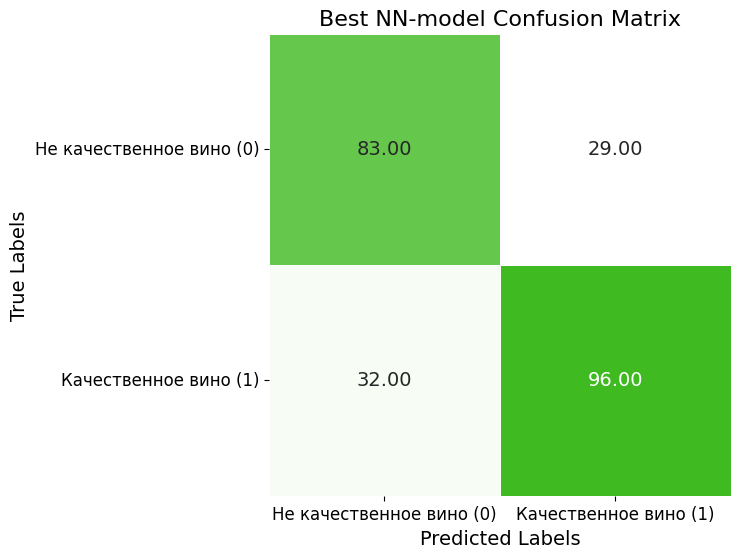


Best NN-model Confusion Matrix (Counts):
[[83 29]
 [32 96]]


In [26]:
best_model.eval()
with torch.no_grad():
    test_outputs = best_model(X_test_tensor)
    test_preds = (test_outputs > 0.5).float()

# Преобразуем тензоры в списки для использования с sklearn
test_preds_list = test_preds.flatten().tolist()
y_test_list = y_test_tensor.flatten().tolist()

print("Матрица ошибок:")
cm = confusion_matrix(y_test_list, test_preds_list)
print(cm)

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

corp_col = '#40ba21'

# Создаем градиентную цветовую карту
def create_gradient_cmap(hex_color):
    rgb_color = tuple(int(hex_color[i:i+2], 16)/255 for i in (1, 3, 5))
    return LinearSegmentedColormap.from_list("", [(1, 1, 1), rgb_color])

c_map = create_gradient_cmap(corp_col)

# Нормализуем матрицу для лучшей визуализации
cm_normalized = cm#.astype('float')# / cm.sum(axis=1)[:, np.newaxis]
    
# Строим матрицу ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(
        cm_normalized, 
        annot=True, 
        fmt=".2f", 
        cmap=c_map, 
        linewidths=.5, 
        square=True,
        cbar=False,
        annot_kws={"size": 14}
    )
plt.title(f'Best NN-model Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.xticks([0.5, 1.5], ['Не качественное вино (0)', 'Качественное вино (1)'], fontsize=12)
plt.yticks([0.5, 1.5], ['Не качественное вино (0)', 'Качественное вино (1)'], fontsize=12, rotation=0)
plt.show()
    
# Выводим числовые значения матрицы
print(f"\nBest NN-model Confusion Matrix (Counts):")
print(cm)



In [27]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_preds = rf_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_preds)
rf_f1 = f1_score(y_test, rf_preds)

# Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train_scaled, y_train)
gb_preds = gb_model.predict(X_test_scaled)
gb_accuracy = accuracy_score(y_test, gb_preds)
gb_f1 = f1_score(y_test, gb_preds)

# Нейронная сеть
nn_accuracy = accuracy_score(y_test_list, test_preds_list)
nn_f1 = f1_score(y_test_list, test_preds_list)

# Выводы относительно полученных моделей
results_df = pd.DataFrame(results)

# Сортируем результаты по точности
sorted_results = results_df.sort_values('Accuracy', ascending=False)

# Выводим топ-10 результатов
print("Топ-10 лучших моделей:")
print("=" * 80)
print(f"{'Архитектура':<12} {'Активация':<12} {'Оптимизатор':<10} {'Эпохи':<8} {'Точность':<8}")
print("-" * 80)
for _, row in sorted_results.head(10).iterrows():
    print(f"{row['Architecture']:<12} {row['Activation']:<12} {row['Optimizer']:<10} {row['Epochs']:<8} {row['Accuracy']:.4f}")

# Сравнение с ансамблевыми моделями
print("\n" + "=" * 80)
print("Сравнение производительности моделей:")
print("=" * 80)
print(f"{'Модель':<20} {'Accuracy':<10} {'F1-score':<10}")
print("-" * 80)
print(f"{'Random Forest':<20} {rf_accuracy:.4f}    {rf_f1:.4f}")
print(f"{'Gradient Boosting':<20} {gb_accuracy:.4f}    {gb_f1:.4f}")
print(f"{'Neural Network':<20} {nn_accuracy:.4f}    {nn_f1:.4f}")

# Детальная информация о лучшей модели
print("\n" + "=" * 80)
print("Информация о лучшей нейронной сети:")
print("=" * 80)
print(f"Архитектура: {best_config['Architecture']}")
print(f"Функция активации: {best_config['Activation']}")
print(f"Оптимизатор: {best_config['Optimizer']}")
print(f"Количество эпох: {best_config['Epochs']}")
print(f"Точность на валидации: {best_accuracy:.4f}")
print(f"Точность на тесте: {nn_accuracy:.4f}")

Топ-10 лучших моделей:
Архитектура  Активация    Оптимизатор Эпохи    Точность
--------------------------------------------------------------------------------
2_layers     Tanh         Adam       5000     0.7875
4_layers     LeakyReLU    Adam       5000     0.7792
2_layers     Tanh         Adam       1000     0.7750
3_layers     ReLU         Adam       1000     0.7708
3_layers     Tanh         Adam       1000     0.7708
3_layers     LeakyReLU    Adam       5000     0.7708
4_layers     Tanh         Adam       5000     0.7708
4_layers     LeakyReLU    SGD        1000     0.7667
3_layers     ReLU         SGD        1000     0.7667
4_layers     LeakyReLU    Adam       1000     0.7625

Сравнение производительности моделей:
Модель               Accuracy   F1-score  
--------------------------------------------------------------------------------
Random Forest        0.7583    0.7734
Gradient Boosting    0.7417    0.7520
Neural Network       0.7458    0.7589

Информация о лучшей нейронной се

## Выводы. 
В целом нейросетевый модели не смогли превысить качество анесамблевых моделей, разница в пользу первых на уровне стат.погрешности.